# LAB 2 // Korelacja SVD
Adam Kubliński, 62204
24.02.2024

Rozwiązanie zadania obliczenia korelacji obrazu pod względem zarówno wierszy jak i kolumn z użyciem SVD według wariantu 6. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.linalg import svd

img = imread('6.webp')
if img.ndim == 3:
    img = np.mean(img, axis=2) 

img_normalized_rows = (img - np.mean(img, axis=1, keepdims=True)) / np.std(img, axis=1, keepdims=True)
img_normalized_columns = (img - np.mean(img, axis=0, keepdims=True)) / np.std(img, axis=0, keepdims=True)

U_rows, _, _ = svd(img_normalized_rows, full_matrices=False)
U_columns, _, _ = svd(img_normalized_columns, full_matrices=False)

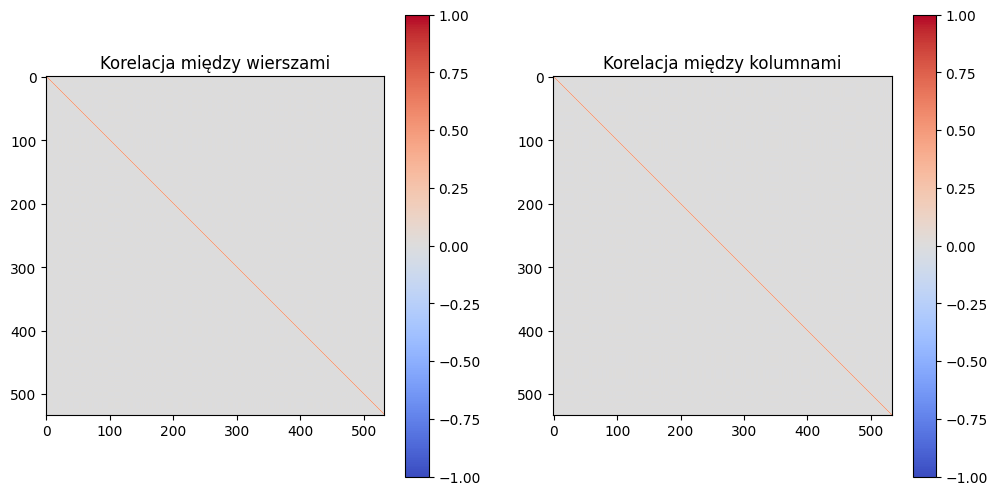

In [4]:
corr_matrix_rows = np.corrcoef(U_rows)
corr_matrix_columns = np.corrcoef(U_columns)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Korelacja między wierszami')
plt.imshow(corr_matrix_rows, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Korelacja między kolumnami')
plt.imshow(corr_matrix_columns, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()

plt.show()